In [2]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [3]:
# import the data and see the basic description

df = spark.read.csv('processed.cleveland.csv',header=True,inferSchema=True)

In [4]:
df.count()

302

In [5]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- X63.0: integer (nullable = true)
 |-- X1.0: integer (nullable = true)
 |-- X1.0.1: integer (nullable = true)
 |-- X145.0: integer (nullable = true)
 |-- X233.0: integer (nullable = true)
 |-- X1.0.2: integer (nullable = true)
 |-- X2.0: integer (nullable = true)
 |-- X150.0: integer (nullable = true)
 |-- X0.0: integer (nullable = true)
 |-- X2.3: double (nullable = true)
 |-- X3.0: integer (nullable = true)
 |-- X0.0.1: string (nullable = true)
 |-- X6.0: string (nullable = true)
 |-- X0: integer (nullable = true)



In [6]:
# set the column names in order ("age", "sex", "cp", "trestbps", "chol","fbs", "restecg","thalach","exang", "oldpeak","slope", "ca", "thal", "num")
df = df.withColumnRenamed(df.columns[0], 'recordid')
df = df.withColumnRenamed(df.columns[1], 'age')
df = df.withColumnRenamed(df.columns[2], 'sex')
df = df.withColumnRenamed(df.columns[3], 'chest_pain')
df = df.withColumnRenamed(df.columns[4], 'blood_pressure')
df = df.withColumnRenamed(df.columns[5], 'serum_cholestoral')
df = df.withColumnRenamed(df.columns[6], 'fasting_blood_sugar')
df = df.withColumnRenamed(df.columns[7], 'electrocardiographic')
df = df.withColumnRenamed(df.columns[8], 'max_heart_rate')
df = df.withColumnRenamed(df.columns[9], 'induced_angina')
df = df.withColumnRenamed(df.columns[10], 'ST_depression')
df = df.withColumnRenamed(df.columns[11], 'slope')
df = df.withColumnRenamed(df.columns[12], 'vessels')
df = df.withColumnRenamed(df.columns[13], 'thal')
df = df.withColumnRenamed(df.columns[14], 'diagnosis')


In [6]:
df.printSchema()

root
 |-- recordid: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- chest_pain: integer (nullable = true)
 |-- blood_pressure: integer (nullable = true)
 |-- serum_cholestoral: integer (nullable = true)
 |-- fasting_blood_sugar: integer (nullable = true)
 |-- electrocardiographic: integer (nullable = true)
 |-- max_heart_rate: integer (nullable = true)
 |-- induced_angina: integer (nullable = true)
 |-- ST_depression: double (nullable = true)
 |-- slope: integer (nullable = true)
 |-- vessels: string (nullable = true)
 |-- thal: string (nullable = true)
 |-- diagnosis: integer (nullable = true)



In [7]:
# convert the dataframe into pandas dataframe and look for standard summary.
df.pd = pd.DataFrame(df.take(302), columns=df.columns)
df.pd.describe()

,recordid,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,diagnosis
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,151.500000,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,87.324109,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.250000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,151.500000,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,226.750000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,302.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [13]:
# Ckeck if we have null values for any attributes
print(df.pd.isnull().sum())

recordid                0
age                     0
sex                     0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
vessels                 0
thal                    0
diagnosis               0
dtype: int64


/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


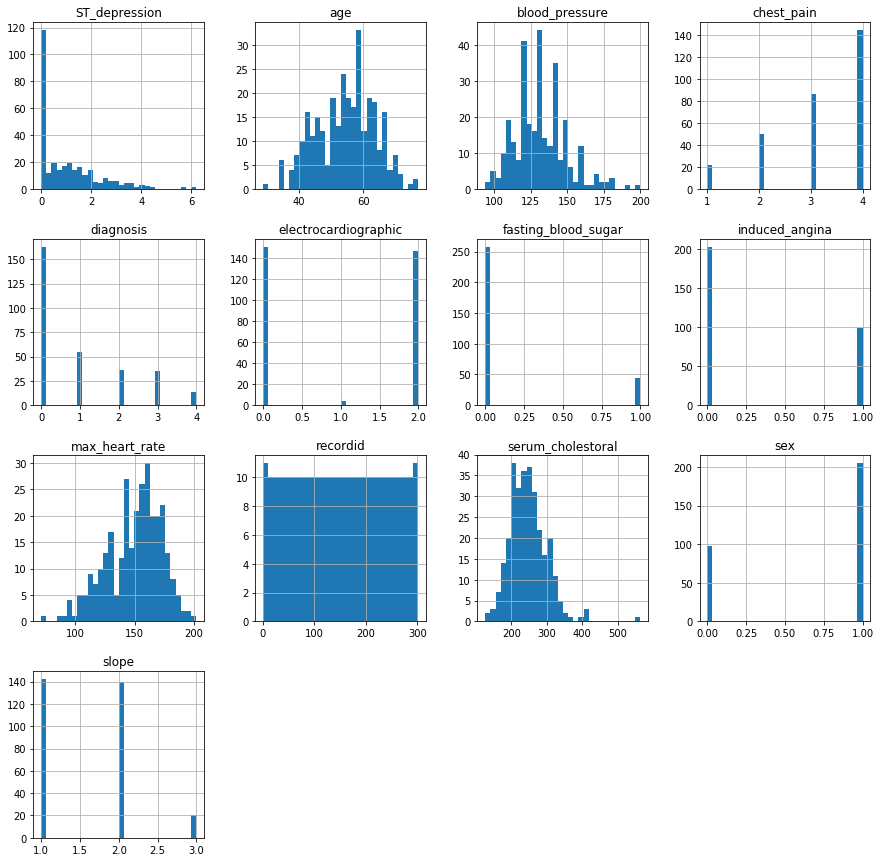

In [14]:
# get the histogram of every data points
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.pd.hist(ax=ax,bins=30)
plt.show()

In [15]:
df.pd.describe()

,recordid,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,diagnosis
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,151.500000,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,87.324109,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.250000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,151.500000,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,226.750000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,302.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Text(0.5,1,'Age vs Cholestrol plot')

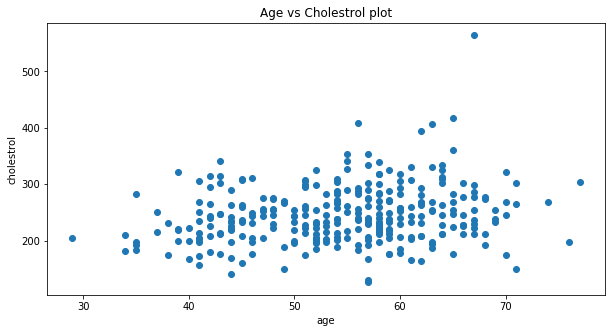

In [112]:
# get the histogram of every data points
fig = plt.figure(figsize = (10,5))
plt.scatter(df.pd['age'],df.pd['serum_cholestoral'])
plt.xlabel("age")
plt.ylabel("cholestrol")
plt.title('Age vs Cholestrol plot')


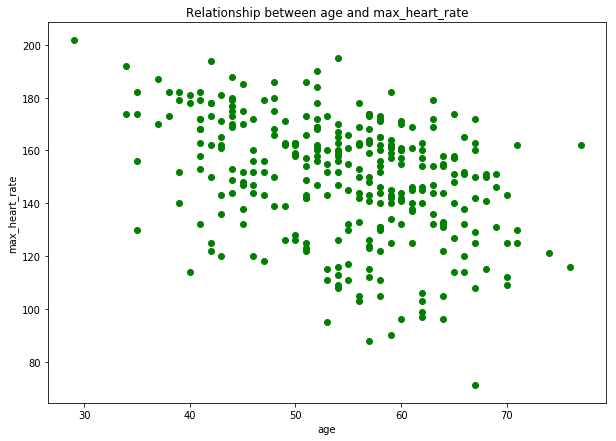

In [115]:
fig = plt.figure(figsize = (10,7))
plt.xlabel("age")
plt.ylabel("max_heart_rate")

# define title
plt.title("Relationship between age and max_heart_rate")

# plot
plt.scatter(df.pd['age'], df.pd['max_heart_rate'], color = 'green')
plt.show()

Text(0,0.5,'Age')

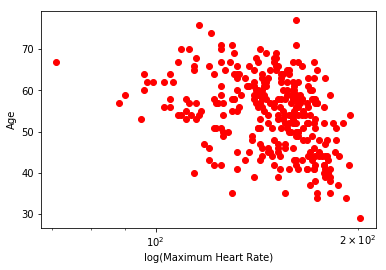

In [15]:

plt.plot(df.pd['max_heart_rate'],df.pd['age'], 'ro')
#plt.yscale('log')
plt.xscale('log')
plt.xlabel('log(Maximum Heart Rate)')
plt.ylabel('Age')

Text(0,0.5,'log(Blood Pressure)')

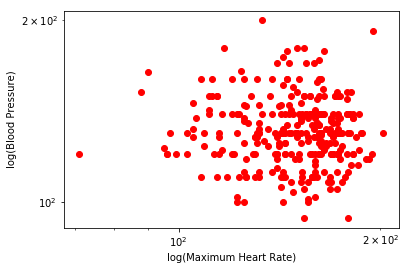

In [16]:
plt.plot(df.pd['max_heart_rate'],df.pd['blood_pressure'], 'ro')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('log(Maximum Heart Rate)')
plt.ylabel('log(Blood Pressure)')

In [17]:
df.groupBy('sex').count().show()

+---+-----+
|sex|count|
+---+-----+
|  1|  205|
|  0|   97|
+---+-----+



In [8]:
df.groupBy('sex', 'diagnosis').count().show()

+---+---------+-----+
|sex|diagnosis|count|
+---+---------+-----+
|  1|        0|   91|
|  1|        2|   29|
|  1|        1|   46|
|  1|        3|   28|
|  0|        0|   72|
|  1|        4|   11|
|  0|        1|    9|
|  0|        2|    7|
|  0|        3|    7|
|  0|        4|    2|
+---+---------+-----+



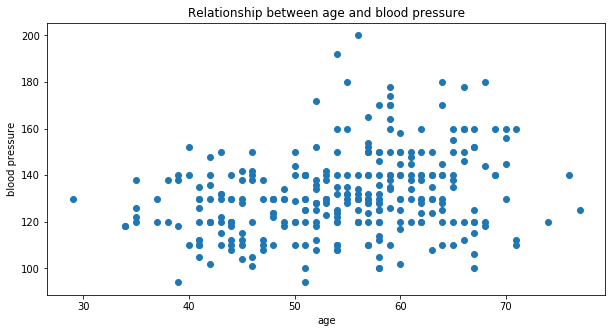

In [140]:
plt.figure(figsize = (10,5))
plt.xlabel("age")
plt.ylabel("blood pressure")

# define title
plt.title("Relationship between age and blood pressure")

# plot
plt.scatter(df.pd['age'], df.pd['blood_pressure'])
plt.show()

In [20]:
print ("Minimum age to Maximum age per disease type")

df.pd.groupby(["diagnosis", ])["age"].min().astype(str) + ', ' +  df.pd.groupby(["diagnosis", ])["age"].max().astype(str)

Minimum age to Maximum age per disease type


diagnosis
0    29, 76
1    35, 70
2    42, 69
3    39, 70
4    38, 77
Name: age, dtype: object

In [21]:
print ("Mean age per disease type")
df.pd.groupby(['diagnosis', ])['age'].mean()

Mean age per disease type


diagnosis
0    52.521472
1    55.381818
2    58.027778
3    56.000000
4    59.692308
Name: age, dtype: float64

In [107]:
print ("Count each sex per heart disease type")
df.pd.groupby(['diagnosis', "sex"])['recordid'].count()

Count each sex per heart disease type


diagnosis  sex
0          0      72
           1      91
1          0       9
           1      46
2          0       7
           1      29
3          0       7
           1      28
4          0       2
           1      11
Name: recordid, dtype: int64

In [108]:
print ("Count each chest pain value per heart disease type")
df.pd.groupby(['diagnosis', 'chest_pain'])['recordid'].count()

Count each chest pain value per heart disease type


diagnosis  chest_pain
0          1             15
           2             41
           3             68
           4             39
1          1              5
           2              6
           3              9
           4             35
2          1              1
           2              1
           3              4
           4             30
3          2              2
           3              4
           4             29
4          1              1
           3              1
           4             11
Name: recordid, dtype: int64

In [24]:
print( "Minimum blood pressure to Maximum  blood pressure per disease type")

df.pd.groupby(['diagnosis'])['blood_pressure'].min().astype(str) + ', ' +  df.pd.groupby(['diagnosis'])['blood_pressure'].max().astype(str)

Minimum blood pressure to Maximum  blood pressure per disease type


diagnosis
0     94, 180
1    108, 192
2    100, 180
3    100, 200
4    112, 165
Name: blood_pressure, dtype: object

In [25]:
print ("Mean blood pressure per disease type")
df.pd.groupby(["diagnosis", ])["blood_pressure"].mean()

Mean blood pressure per disease type


diagnosis
0    129.153374
1    133.254545
2    134.194444
3    135.457143
4    138.769231
Name: blood_pressure, dtype: float64

In [26]:
print ("Minimum serum_cholestoral to Maximum serum_cholestoral per disease type")

df.pd.groupby(["diagnosis"])["serum_cholestoral"].min().astype(str) + ', ' +  df.pd.groupby(["diagnosis"])["serum_cholestoral"].max().astype(str)

Minimum serum_cholestoral to Maximum serum_cholestoral per disease type


diagnosis
0    126, 564
1    149, 335
2    169, 409
3    131, 353
4    166, 407
Name: serum_cholestoral, dtype: object

In [27]:
print ("Mean serum_cholestoral per disease type")
df.pd.groupby(["diagnosis", ])["serum_cholestoral"].mean()

Mean serum_cholestoral per disease type


diagnosis
0    242.699387
1    249.109091
2    259.277778
3    246.457143
4    253.384615
Name: serum_cholestoral, dtype: float64

In [28]:
print ("Count each fasting_blood_sugar per heart disease type")
df.pd.groupby(["diagnosis", "fasting_blood_sugar"])["age"].count()

Count each fasting_blood_sugar per heart disease type


diagnosis  fasting_blood_sugar
0          0                      141
           1                       22
1          0                       51
           1                        4
2          0                       27
           1                        9
3          0                       27
           1                        8
4          0                       12
           1                        1
Name: age, dtype: int64

In [109]:
print ("Count each electrocardiographic per heart disease type")
df.pd.groupby(["diagnosis", "electrocardiographic"])["recordid"].count()


Count each electrocardiographic per heart disease type


diagnosis  electrocardiographic
0          0                       95
           1                        1
           2                       67
1          0                       23
           2                       32
2          0                       19
           1                        1
           2                       16
3          0                       12
           1                        1
           2                       22
4          0                        2
           1                        1
           2                       10
Name: recordid, dtype: int64

In [30]:

print ("Minimum max_heart_rate to Maximum max_heart_rate per disease type")
df.pd.groupby(["diagnosis"])["max_heart_rate"].min().astype(str) + ', ' +  df.pd.groupby(["diagnosis"])["max_heart_rate"].max().astype(str)


Minimum max_heart_rate to Maximum max_heart_rate per disease type


diagnosis
0     96, 202
1     88, 195
2     71, 170
3     90, 173
4    114, 182
Name: max_heart_rate, dtype: object

In [31]:
print ("Count  induced_angina per heart disease type")
df.pd.groupby(["diagnosis", "induced_angina"])["age"].count()

Count  induced_angina per heart disease type


diagnosis  induced_angina
0          0                 140
           1                  23
1          0                  30
           1                  25
2          0                  14
           1                  22
3          0                  12
           1                  23
4          0                   7
           1                   6
Name: age, dtype: int64

In [32]:
print ("Count  mean ST_depression per heart disease type")
df.pd.groupby(["diagnosis"])["ST_depression"].mean()

Count  mean ST_depression per heart disease type


diagnosis
0    0.576074
1    1.005455
2    1.780556
3    1.962857
4    2.361538
Name: ST_depression, dtype: float64

In [33]:
print ("Count slope per heart disease type")
df.pd.groupby(["diagnosis", "slope"])["age"].count()

Count slope per heart disease type


diagnosis  slope
0          1        106
           2         49
           3          8
1          1         22
           2         31
           3          2
2          1          7
           2         26
           3          3
3          1          6
           2         24
           3          5
4          1          1
           2         10
           3          2
Name: age, dtype: int64

In [34]:
df.printSchema()
#print ("Count  mean thal per heart disease type")
#df.pd.groupby(["diagnosis"])["thal"].mean()

root
 |-- recordid: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- chest_pain: integer (nullable = true)
 |-- blood_pressure: integer (nullable = true)
 |-- serum_cholestoral: integer (nullable = true)
 |-- fasting_blood_sugar: integer (nullable = true)
 |-- electrocardiographic: integer (nullable = true)
 |-- max_heart_rate: integer (nullable = true)
 |-- induced_angina: integer (nullable = true)
 |-- ST_depression: double (nullable = true)
 |-- slope: integer (nullable = true)
 |-- vessels: string (nullable = true)
 |-- thal: string (nullable = true)
 |-- diagnosis: integer (nullable = true)



In [9]:
df.pd.loc[df.pd['thal'] == '?']


,recordid,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
86,87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,?,0
265,266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,?,2


In [10]:
df.pd.loc[df.pd['vessels'] == '?']

,recordid,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
165,166,52,1,3,138,223,0,0,169,0,0.0,1,?,3.0,0
191,192,43,1,4,132,247,1,2,143,1,0.1,2,?,7.0,1
286,287,58,1,2,125,220,0,0,144,0,0.4,2,?,7.0,0
301,302,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [11]:
# Imputing missing values by mean
for c in df.pd.columns[:-1]:
        df.pd[c] = df.pd[c].apply(lambda x: df.pd[df.pd[c]!='?'][c].astype(float).mean() if x == "?" else x)
        df.pd[c] = df.pd[c].astype(float)

In [12]:
rec = [86,265,165,191,286,301]
df.pd.loc[df.pd['recordid'].isin(rec)]


,recordid,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
85,86.0,47.0,1.0,3.0,138.0,257.0,0.0,2.0,156.0,0.0,0.0,1.0,0.0,3.0,0
164,165.0,57.0,1.0,4.0,132.0,207.0,0.0,0.0,168.0,1.0,0.0,1.0,0.0,7.0,0
190,191.0,51.0,1.0,4.0,140.0,298.0,0.0,0.0,122.0,1.0,4.2,2.0,3.0,7.0,3
264,265.0,42.0,1.0,4.0,136.0,315.0,0.0,0.0,125.0,1.0,1.8,2.0,0.0,6.0,2
285,286.0,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
300,301.0,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [13]:
df.pd.loc[df.pd['serum_cholestoral']==564]

,recordid,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
151,152.0,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0


In [14]:
df.pd.loc[df.pd['serum_cholestoral']==564, 'serum_cholestoral'] = 264

In [15]:
df.pd.loc[df.pd['recordid']==152]

,recordid,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
151,152.0,67.0,0.0,3.0,115.0,264.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0


In [39]:
print ("Count  mean thal per heart disease type")
df.pd.groupby(["diagnosis"])["thal"].mean()

Count  mean thal per heart disease type


diagnosis
0    3.789755
1    5.345455
2    5.992500
3    6.285714
4    6.230769
Name: thal, dtype: float64

In [16]:
#map dependent variable y = "diagnosis" into binary label
# if "diagnosis" == 0, member does not have disease A - we put 0
# if "diagnosis" >= 1, member possess the disease A - we put 1
df.pd.loc[:, "diag_ind"] = df.pd.loc[:, "diagnosis"].apply(lambda x: 1 if x >= 1 else 0)

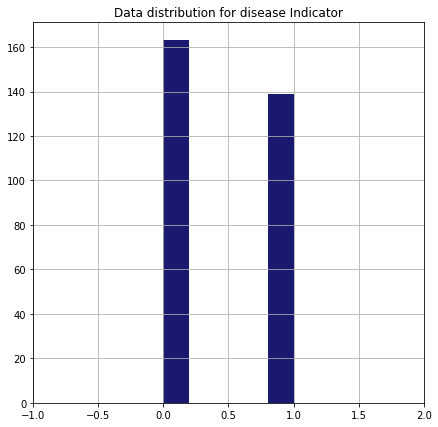

In [127]:
# get the histogram of every data points
plt.figure(figsize = (7,7))
df.pd['diag_ind'].hist(bins=5,facecolor='midnightblue')
plt.title('Data distribution for disease Indicator')
plt.xlim(-1,2)

plt.show()

In [41]:
df.pd.head()

,recordid,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis,diag_ind
0,1.0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
1,2.0,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
2,3.0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
3,4.0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
4,5.0,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,0


In [17]:
#Convert pandas dataframe into Spark dataframe after data cleaning
spark_df = spark.createDataFrame(df.pd)


In [43]:
spark_df.printSchema()

root
 |-- recordid: double (nullable = true)
 |-- age: double (nullable = true)
 |-- sex: double (nullable = true)
 |-- chest_pain: double (nullable = true)
 |-- blood_pressure: double (nullable = true)
 |-- serum_cholestoral: double (nullable = true)
 |-- fasting_blood_sugar: double (nullable = true)
 |-- electrocardiographic: double (nullable = true)
 |-- max_heart_rate: double (nullable = true)
 |-- induced_angina: double (nullable = true)
 |-- ST_depression: double (nullable = true)
 |-- slope: double (nullable = true)
 |-- vessels: double (nullable = true)
 |-- thal: double (nullable = true)
 |-- diagnosis: long (nullable = true)
 |-- diag_ind: long (nullable = true)



In [18]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder)
feature_cols = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar','electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels','thal']

vec_assembler = VectorAssembler(inputCols=feature_cols, outputCol='feature')

final_data = vec_assembler.transform(spark_df)

In [19]:
final_data.printSchema()

root
 |-- recordid: double (nullable = true)
 |-- age: double (nullable = true)
 |-- sex: double (nullable = true)
 |-- chest_pain: double (nullable = true)
 |-- blood_pressure: double (nullable = true)
 |-- serum_cholestoral: double (nullable = true)
 |-- fasting_blood_sugar: double (nullable = true)
 |-- electrocardiographic: double (nullable = true)
 |-- max_heart_rate: double (nullable = true)
 |-- induced_angina: double (nullable = true)
 |-- ST_depression: double (nullable = true)
 |-- slope: double (nullable = true)
 |-- vessels: double (nullable = true)
 |-- thal: double (nullable = true)
 |-- diagnosis: long (nullable = true)
 |-- diag_ind: long (nullable = true)
 |-- feature: vector (nullable = true)



In [20]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline


features = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar','electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels','thal']
lr_data = spark_df.select(spark_df['diag_ind'].alias("label"), *features)  
#lr_data.printSchema()
vector = VectorAssembler(inputCols=features, outputCol="features")
rfr = RandomForestRegressor(labelCol="label", featuresCol="features")


stages = [vector, rfr]
pipe = Pipeline(stages=stages)


estimatorParam = ParamGridBuilder() \
.addGrid(rfr.maxDepth, [4, 6, 8]) \
.addGrid(rfr.maxBins, [5, 10, 20, 40]) \
.addGrid(rfr.impurity, ["variance"]) \
.build()

evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")


In [21]:
crossval = CrossValidator(estimator=pipe,
                         estimatorParamMaps=estimatorParam,
                         evaluator=evaluator,
                         numFolds=3)

cvmodel = crossval.fit(lr_data)

model = pd.DataFrame(cvmodel.bestModel.stages[-1].featureImportances.toArray(), columns=["values"])
features_col = pd.Series(features)
model["features"] = features_col
model

,values,features
0,0.073164,age
1,0.022833,sex
2,0.134245,chest_pain
3,0.053647,blood_pressure
4,0.041027,serum_cholestoral
5,0.003331,fasting_blood_sugar
6,0.019713,electrocardiographic
7,0.100687,max_heart_rate
8,0.037295,induced_angina
9,0.089912,ST_depression


In [22]:
from pyspark.sql.types import StructType, StructField, DoubleType, StringType

new_schema = StructType([
  StructField("values", DoubleType(), False),
  StructField("features", StringType(), False)
])

feature_importance = spark.createDataFrame(model, schema=new_schema)
feature_importance.orderBy("values", ascending=False).show()

+--------------------+--------------------+
|              values|            features|
+--------------------+--------------------+
| 0.25876341757387106|                thal|
|  0.1449315818551519|             vessels|
| 0.13424483694632464|          chest_pain|
| 0.10068679643476164|      max_heart_rate|
| 0.08991204858558483|       ST_depression|
| 0.07316419831413289|                 age|
|0.053647218678075384|      blood_pressure|
| 0.04102722016997071|   serum_cholestoral|
| 0.03729484307363302|      induced_angina|
| 0.02283331114984992|                 sex|
| 0.02045126291431261|               slope|
|0.019712718680574916|electrocardiographic|
|0.003330545623756335| fasting_blood_sugar|
+--------------------+--------------------+



In [23]:
model_ready_data = final_data.select('feature','diag_ind')
model_ready_data.show(2)

+--------------------+--------+
|             feature|diag_ind|
+--------------------+--------+
|[67.0,1.0,4.0,160...|       1|
|[67.0,1.0,4.0,120...|       1|
+--------------------+--------+
only showing top 2 rows



In [24]:
# Split our data. Note that the new DataFrame is being used.
train_data, test_data = model_ready_data.randomSplit([0.8,0.2])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))


Training Dataset Count: 243
Test Dataset Count: 59


In [175]:
from pyspark.ml.classification import LogisticRegression
# Instantiate the model.
lr_model = LogisticRegression(featuresCol='feature',labelCol='diag_ind')

# Fit the model.
lr_model = lr_model.fit(train_data)

#Summary of the model
lr_model.summary.predictions.describe().show()


+-------+-------------------+-------------------+
|summary|           diag_ind|         prediction|
+-------+-------------------+-------------------+
|  count|                244|                244|
|   mean|0.47540983606557374| 0.4385245901639344|
| stddev|  0.500421464410522|0.49722633498178664|
|    min|                0.0|                0.0|
|    max|                1.0|                1.0|
+-------+-------------------+-------------------+



In [176]:

# And evaluate the model using the test data.
results = lr_model.evaluate(test_data)

In [63]:
results.predictions.show()

+--------------------+--------+--------------------+--------------------+----------+
|             feature|diag_ind|       rawPrediction|         probability|prediction|
+--------------------+--------+--------------------+--------------------+----------+
|(13,[0,2,3,4,7,10...|       0|[4.28655408787105...|[0.98643432558418...|       0.0|
|(13,[0,2,3,4,7,10...|       0|[2.94737121920679...|[0.95013909776164...|       0.0|
|[35.0,1.0,4.0,126...|       1|[-0.9645107972583...|[0.27597596769714...|       1.0|
|[38.0,1.0,3.0,138...|       0|[2.16764005967905...|[0.89730570616825...|       0.0|
|[39.0,1.0,3.0,140...|       0|[1.54341796107011...|[0.82396104696367...|       0.0|
|[39.0,1.0,4.0,118...|       1|[-0.4546906022062...|[0.38824611385762...|       1.0|
|[43.0,1.0,4.0,115...|       0|[0.94253476240326...|[0.71961138314131...|       0.0|
|[44.0,0.0,3.0,118...|       0|[1.77937465273832...|[0.85561963101530...|       0.0|
|[44.0,1.0,2.0,120...|       0|[3.55975290086259...|[0.9723409329

In [230]:
from pyspark.ml.classification import LogisticRegression
# Instantiate the model.
lr_model = LogisticRegression(featuresCol='feature',labelCol='diag_ind')

# Fit the model.
lr_model = lr_model.fit(train_data)

#Summary of the model
lr_model.summary.predictions.describe().show()




+-------+-------------------+-------------------+
|summary|           diag_ind|         prediction|
+-------+-------------------+-------------------+
|  count|                244|                244|
|   mean|0.47540983606557374| 0.4385245901639344|
| stddev|  0.500421464410522|0.49722633498178664|
|    min|                0.0|                0.0|
|    max|                1.0|                1.0|
+-------+-------------------+-------------------+



In [231]:
# And evaluate the model using the test data.
results = lr_model.evaluate(test_data)

from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(rawPredictionCol= 'prediction', labelCol='diag_ind')
evaluator.evaluate(results.predictions)

0.8496894409937888

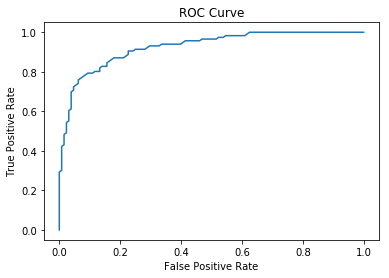

Area Under the Curve: 0.9253771551724139


In [232]:
# Let's get a summary of the data.
training_summary = lr_model.summary


# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

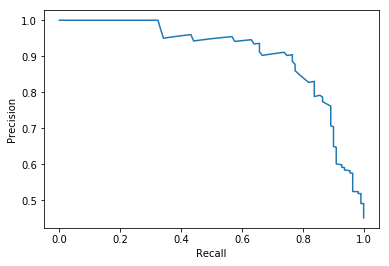

In [244]:
# Convert DataFrame to Pandas DataFrame.
pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')

plt.show()

In [245]:
## Next iteration

feature_cols = ['thal','vessels','ST_depression','induced_angina','max_heart_rate','age','blood_pressure','slope','serum_cholestoral']
vec_assemblerI2 = VectorAssembler(inputCols=feature_cols, outputCol='feature')
final_dataI2 = vec_assemblerI2.transform(spark_df)
model_ready_dataI2 = final_dataI2.select('feature','diag_ind')

train_dataI2, test_dataI2 = model_ready_dataI2.randomSplit([0.8,0.2])
print("Training Dataset Count: " + str(train_dataI2.count()))
print("Test Dataset Count: " + str(test_dataI2.count()))

lr_modelI2 = LogisticRegression(featuresCol='feature',labelCol='diag_ind', maxIter=12)

# Fit the model.
lr_modelI2 = lr_modelI2.fit(train_dataI2)

resultsI2 = lr_modelI2.evaluate(test_dataI2)

evaluatorI2 = BinaryClassificationEvaluator(rawPredictionCol= 'prediction', labelCol='diag_ind')
evaluatorI2.evaluate(resultsI2.predictions)

Training Dataset Count: 240
Test Dataset Count: 62


0.7729166666666667

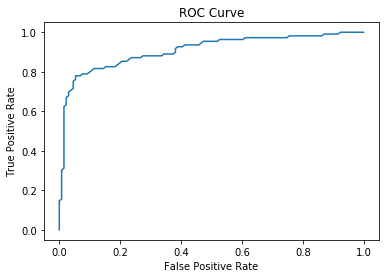

Area Under the Curve: 0.90836193010715


In [246]:
# Let's get a summary of the data.
training_summary = lr_modelI2.summary


# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

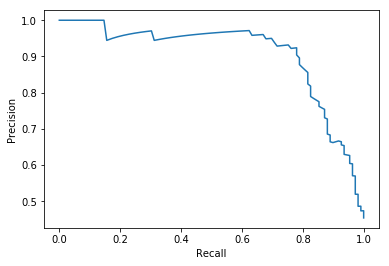

In [247]:
# Convert DataFrame to Pandas DataFrame.
pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [26]:
from pyspark.ml.classification import LogisticRegression
# Instantiate the model.
lr_model = LogisticRegression(featuresCol='feature',labelCol='diag_ind',maxIter=50)

# Fit the model.
lr_model = lr_model.fit(train_data)



# And evaluate the model using the test data.
results = lr_model.evaluate(test_data)

from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(rawPredictionCol= 'prediction', labelCol='diag_ind')
evaluator.evaluate(results.predictions)

0.7782258064516128

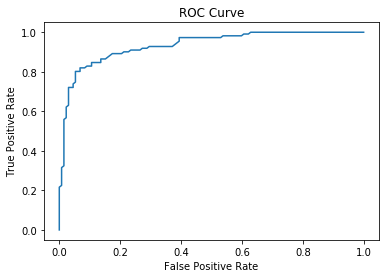

Area Under the Curve: 0.9340363090363094


In [28]:
# Let's get a summary of the data.
training_summary = lr_model.summary


# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()


# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

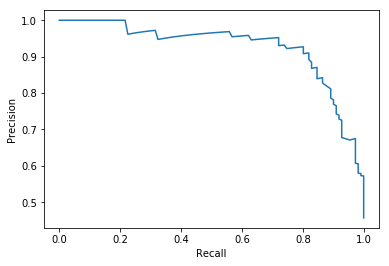

In [29]:
# Convert DataFrame to Pandas DataFrame.
pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()